<a href="https://colab.research.google.com/github/KwakuBonfulBosompim/MSc-Data-Analytics-and-ML-Projects/blob/main/Titanic_Survival_Prediction_(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning Model
Linear Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Feature Engineering

Potential data sources:
Databases
create your own data(simulation) / run a survey
sensors / Devices that measure data
web scraping/ API (Application Programming interface)

In [ ]:
X = train_df.loc[:, 'Pclass':]
y = train_df['Survived']

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


Train-Validation-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xval, ytrain, yval = train_test_split(X,y, test_size=0.20, random_state=41, stratify=y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.20, random_state=41, stratify=y)

In [ ]:
yval

,Survived
328,1
768,0
136,1
295,0
368,1
...,...
349,0
618,1
760,0
277,0


EDA

In [ ]:
dftrain = pd.concat([Xtrain,ytrain], axis=1)
#dftrain

In [ ]:
print(dftrain.columns.values)

['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Cabin'
 'Embarked' 'Survived']


In [ ]:
Xval.isnull().sum()

,0
Pclass,0
Name,0
Sex,0
Age,36
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,141
Embarked,0


Name, Sex and Age are self-explanatory SibSp is the total number of the passengers'siblings and spouse Parch is the total number of the passengers' parents and children

Ticket is the ticket number of the passenger Fare is the passenger fare Cabin is the cabin number of the passenger
Embarked is port of embarkation and its a categorical feature which has 3 unique values (C, Q, or S):m

2-Feature Engineering 2.1- Feature Engineering of Xtrain

In [ ]:
#sur = sns.FacetGrid(train_df, row='Age', size=3.2, aspect=2.6)
#sur.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
#sur.add_legend()

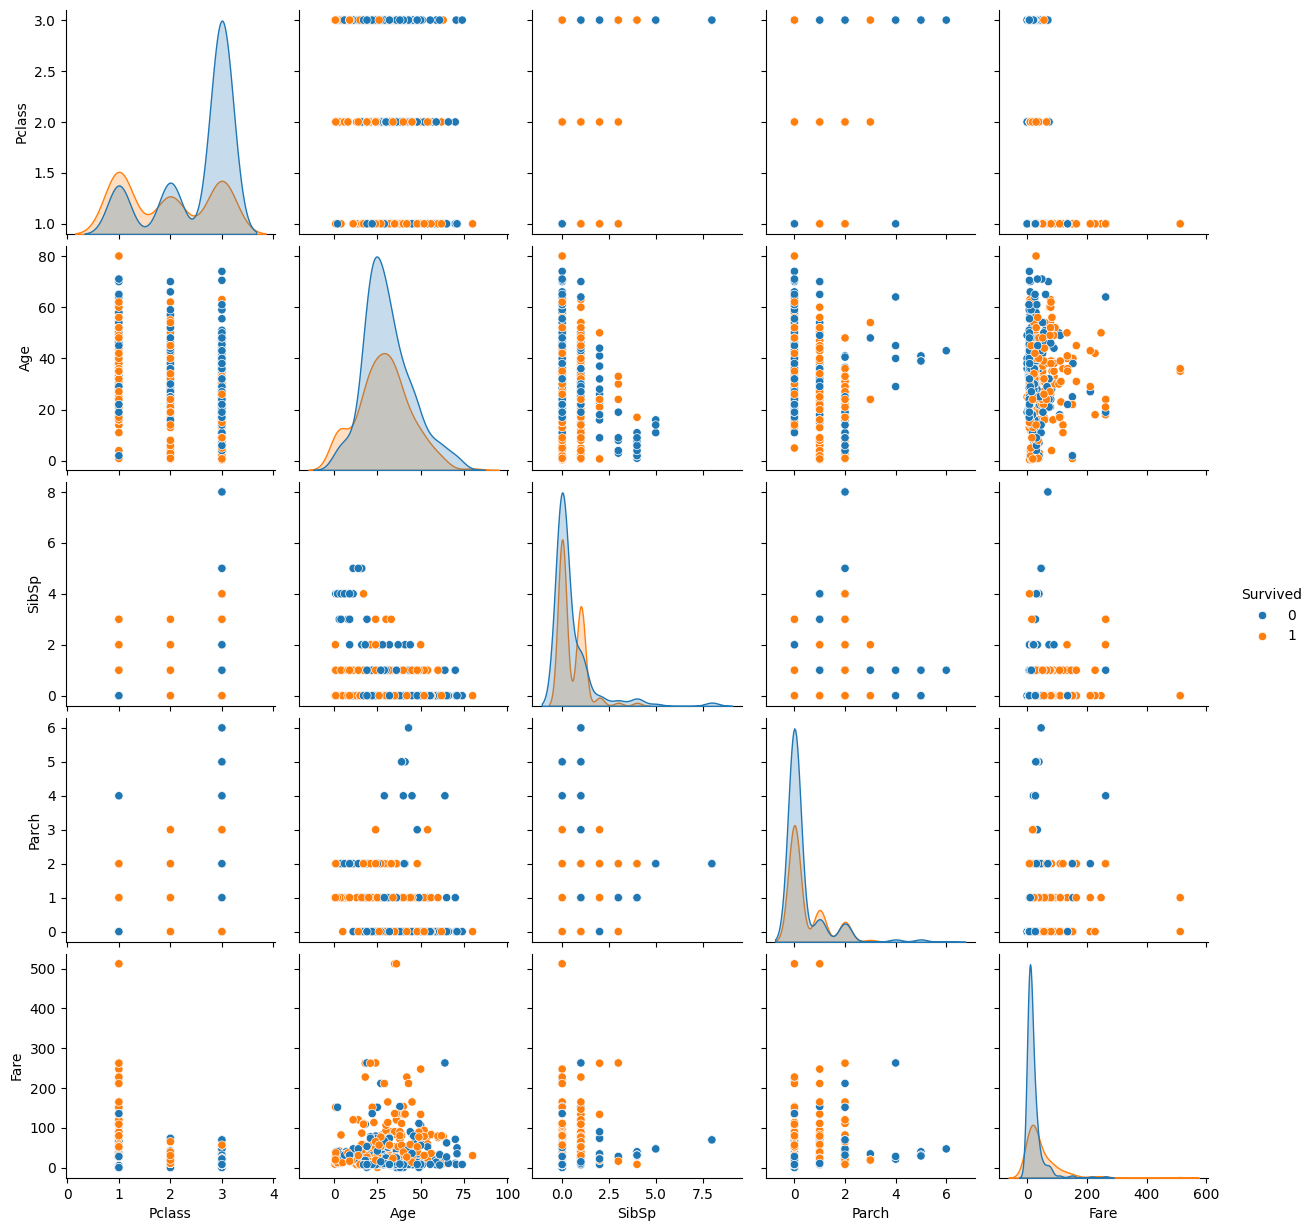

In [ ]:
sns.pairplot(dftrain, hue='Survived');

In [ ]:
Xtrain.shape, Xval.shape
#Xtrain, Xval, ytrain, yval

((712, 10), (179, 10))

In [ ]:
ytrain.shape, yval.shape

((712,), (179,))

In [ ]:
catCols = [col for col in dftrain.columns if dftrain[col].dtype=="0"]
catCols

[]

Logistic Regression Build a LogReg model for the Titanic data
    * Start with the Pclass column only (becuase it is numerical and complete).
    * Print the coefficients calculated by the model.

2- Feature Engineering 2.2-Feature Engineering of Xval

The Pipeline

To apply several FE techniques to the same columns we have to create our own custom preprocessor

    A Pipeline runs several transformers/ preprocessors in a row. E.g to apply both imputing and scaling.

    A pipeline is a transformer and can be used insid a ColumnTransformer

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
impute_and_then_bin = make_pipeline(SimpleImputer(strategy = 'median'),
                                    KBinsDiscretizer(encode='onehot-dense'))
impute_and_then_ohe = make_pipeline(SimpleImputer(strategy = 'most_frequent'),
                                    OneHotEncoder(sparse_output = False, drop = 'first'))

In [ ]:
# it is tuple (name, transformer columns)
fe = ColumnTransformer([('ohe_isclass', OneHotEncoder(sparse_output=False), ['Pclass']),
                        ('ohe_issex', OneHotEncoder(sparse_output=False), ['Sex']),
                        ('impute_and_then_bin', impute_and_then_bin, ['Age']),
                        ('scaling', MinMaxScaler(), ['Fare']),
                        ('impute_and_then_ohe', impute_and_then_ohe, ['Embarked'])
                        ])
fe

ColumnTransformer(transformers=[('ohe_isclass',
                                 OneHotEncoder(sparse_output=False),
                                 ['Pclass']),
                                ('ohe_issex',
                                 OneHotEncoder(sparse_output=False), ['Sex']),
                                ('impute_and_then_bin',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(encode='onehot-dense'))]),
                                 ['Age']),
                                ('scaling', MinMaxScaler(), ['Fare']),
                                ('impute_and_then_ohe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Embarked'])])

In [ ]:
# from sklearn.dummy import DummyClassifier
# dummy_clf = DummyClassifierxtrain_trans

In [ ]:
fe.fit(Xtrain)
# transform the training data
X_train_trans = fe.transform(Xtrain)
pd.DataFrame(X_train_trans, columns= fe.get_feature_names_out())

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,ohe_isclass__Pclass_1,ohe_isclass__Pclass_2,ohe_isclass__Pclass_3,ohe_issex__Sex_female,ohe_issex__Sex_male,impute_and_then_bin__Age_0.0,impute_and_then_bin__Age_1.0,impute_and_then_bin__Age_2.0,impute_and_then_bin__Age_3.0,scaling__Fare,impute_and_then_ohe__Embarked_Q,impute_and_then_ohe__Embarked_S
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.063436,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.028221,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.015412,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.015412,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.042315,0.0,0.0
708,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.059532,0.0,1.0
709,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.014932,0.0,1.0
710,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.054107,0.0,0.0


In [ ]:
fe.fit(Xtest)
# transform the training data
X_test_trans = fe.transform(Xtest)
pd.DataFrame(X_test_trans, columns= fe.get_feature_names_out())

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,ohe_isclass__Pclass_1,ohe_isclass__Pclass_2,ohe_isclass__Pclass_3,ohe_issex__Sex_female,ohe_issex__Sex_male,impute_and_then_bin__Age_0.0,impute_and_then_bin__Age_1.0,impute_and_then_bin__Age_2.0,impute_and_then_bin__Age_3.0,scaling__Fare,impute_and_then_ohe__Embarked_Q,impute_and_then_ohe__Embarked_S
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.040062,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.047138,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.051302,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.054107,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.015127,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.016908,0.0,1.0
175,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.076123,0.0,1.0
176,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.028302,0.0,1.0
177,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0


Fit the model on the (transformed) training data

initialize the model
fit the model on the transformed training data

In [38]:
from sklearn.linear_model import LogisticRegression
m_lgr = LogisticRegression()
m_lgr.fit(X_train_trans, ytrain)

LogisticRegression()

Evaluate the model on the (transformed) test data

In [39]:
m_lgr.score(X_train_trans, ytrain)

0.7963483146067416

Building the model together with feature engineering

In [40]:
one_go_mlr = make_pipeline(fe, LogisticRegression(max_iter=10000))
one_go_mlr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe_isclass',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Pclass']),
                                                 ('ohe_issex',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Sex']),
                                                 ('impute_and_then_bin',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('kbinsdiscretizer',
                                                                   KBinsDiscretizer(encode='onehot-dense'))]),
                                                  ['Age']),
                                                 ('scaling', MinMaxScaler(),
                                                  ['Fare']),
                                                 ('impute_and_then_ohe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Embarked'])])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [46]:
X_val_trans = fe.transform(Xval)
m_lgr.score(X_val_trans, yval)

0.8491620111731844

Evaluate Predictions

In [47]:
Xval.shape, Xtrain.shape

((179, 10), (712, 10))

Calculate an accuracy score

In [50]:
from sklearn.metrics import accuracy_score

rf_prediction_val = m_lgr.predict(X_val_trans)
round(accuracy_score(yval, rf_prediction_val), 2)

0.85

In [52]:
rf_prediction_val = m_lgr.predict(X_test_trans)
rf_prediction_val

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0])

Cross-Validation
k-Fold Cross-Validation

you always need with X_train dataframe and with y series

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(m_lgr, X_train_trans, ytrain, cv=9)
scores

array([0.7625    , 0.78481013, 0.84810127, 0.82278481, 0.81012658,
       0.81012658, 0.82278481, 0.72151899, 0.73417722])

the other way of doing the same thing (more explicit)

create a KFold object with 5 splits

In [58]:
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(m_lgr, X_train_trans, ytrain, cv=folds)
scores

array([0.86013986, 0.72027972, 0.8028169 , 0.77464789, 0.78873239])

In [61]:
scores = cross_val_score(
    m_lgr,
    X_train_trans,
    ytrain,
    cv=KFold(5, shuffle=True),
    scoring='r2'
)

StratifiedKFold used for Classification problems